In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

from scipy.stats import norm

import warnings 
warnings.filterwarnings('ignore')


In [82]:
def bold_text(text):
    bold_start = '\033[1m'
    bold_end = '\033[0m'
    return bold_start + text + bold_end

# Defining Business Problem 

Walmart wants to analyze customer behavior based upon customer’s gender and other factors to help the business make better decisions. They want to understand if the <b>spending habits differ between male and female customers: “Do women buy more than men on Black Friday Sale?”


## 1. Observations on shape of data, data types of all the attributes, conversion of categorical attributes to category

In [83]:
df = pd.read_csv('Walmart.csv')

In [84]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [85]:
df.shape

(550068, 10)

In [86]:
df.columns = df.columns.str.lower()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   user_id                     550068 non-null  int64 
 1   product_id                  550068 non-null  object
 2   gender                      550068 non-null  object
 3   age                         550068 non-null  object
 4   occupation                  550068 non-null  int64 
 5   city_category               550068 non-null  object
 6   stay_in_current_city_years  550068 non-null  object
 7   marital_status              550068 non-null  int64 
 8   product_category            550068 non-null  int64 
 9   purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


Changed `marital_status`, `product_category`, `occupation` to object type cols 

In [88]:
df['marital_status'] = df['marital_status'].astype('object')
df['product_category'] = df['product_category'].astype('object')
df['occupation'] = df['occupation'].astype('object')

In [89]:
df.describe()

,user_id,purchase
count,5.500680e+05,550068.000000
mean,1.003029e+06,9263.968713
std,1.727592e+03,5023.065394
min,1.000001e+06,12.000000
25%,1.001516e+06,5823.000000
50%,1.003077e+06,8047.000000
75%,1.004478e+06,12054.000000
max,1.006040e+06,23961.000000


In [90]:
df.describe(include = 'object')

,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category
count,550068,550068,550068,550068,550068,550068,550068,550068
unique,3631,2,7,21,3,5,2,20
top,P00265242,M,26-35,4,B,1,0,5
freq,1880,414259,219587,72308,231173,193821,324731,150933


### Observations: 
1. There are 7 different bins of age and most of transactions belong to 26-35 age group.
2. There are two types of genders that are present in the dataset, most of transactions are from gender `M`.
3. There are 21 unique values in occupation column and most of the transactions done by users belonging to occupation 4.
4. There are only 3 different city_category, most of the customers being in city_category `B`. 
5. There are 20 different product_category, most of the products being of product_category 5.
6. Most of the transactions performed by users are are unmarried.


In [91]:
df.isna().sum()

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category              0
purchase                      0
dtype: int64

In [115]:
def new_age(x):
    if x == '0-17' or x == '18-25':
        return '0-25'
    elif x == '36-45' or x == '46-50' or x == '51-55':
        return '36-55'
    return x
        

In [116]:
df['age_new'] = df.age.apply(new_age)
df['age_new'].value_counts()

26-35    219587
36-55    194215
0-25     114762
55+       21504
Name: age_new, dtype: int64

## 2. Non-Graphical Analysis: Value counts and Unique attributes

### The highest no of transactions was done by this group

In [92]:
print("No of unique value in user_id",df.user_id.nunique())
print("No of unique value in user_id",df.product_id.nunique())

No of unique value in user_id 5891
No of unique value in user_id 3631


In [93]:
df[['user_id','marital_status']].drop_duplicates(keep = 'first').shape

(5891, 2)

There are a total of 5891 users who had made 5.5 million purchases  

In [94]:
col_list = ['gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category']

In [95]:
print(f"Number of males and females are:\n{df[['user_id','gender']].drop_duplicates(keep = 'first')['gender'].value_counts()}")
print(f"\nTotal number of transactions performed by males and females are:\n{df['gender'].value_counts()}")

print(f"\n\nNo of married and unmarried users are:\n{df[['user_id','marital_status']].drop_duplicates(keep = 'first')['marital_status'].value_counts()}")
print(f"\nTotal number of transactions performed by married and unmarried users are:\n{df['marital_status'].value_counts()}")

print(f"\n\nNo of users in diff age groups are:\n{df[['user_id','age']].drop_duplicates(keep = 'first')['age'].value_counts()}")
print(f"\nTotal number of transactions peformed by users of different age groups are:\n{df['age'].value_counts()}")

print(f"\n\nNo of users in diff city category are:\n{df[['user_id','city_category']].drop_duplicates(keep = 'first')['city_category'].value_counts()}")
print(f"\nTotal number of transactions performed from diff city category are:\n{df['city_category'].value_counts()}")

print(f"\n\nNo of users that stayed for different years in current city are:\n{df[['user_id','stay_in_current_city_years']].drop_duplicates(keep = 'first')['stay_in_current_city_years'].value_counts()}")
print(f"\nTotal number of transactions of users that stayed for different years in current city are:\n{df['stay_in_current_city_years'].value_counts()}")


Number of males and females are:
M    4225
F    1666
Name: gender, dtype: int64

Total number of transactions performed by males and females are:
M    414259
F    135809
Name: gender, dtype: int64


No of married and unmarried users are:
0    3417
1    2474
Name: marital_status, dtype: int64

Total number of transactions performed by married and unmarried users are:
0    324731
1    225337
Name: marital_status, dtype: int64


No of users in diff age groups are:
26-35    2053
36-45    1167
18-25    1069
46-50     531
51-55     481
55+       372
0-17      218
Name: age, dtype: int64

Total number of transactions peformed by users of different age groups are:
26-35    219587
36-45    110013
18-25     99660
46-50     45701
51-55     38501
55+       21504
0-17      15102
Name: age, dtype: int64


No of users in diff city category are:
C    3139
B    1707
A    1045
Name: city_category, dtype: int64

Total number of transactions performed from diff city category are:
B    231173
C    171175
A

In [96]:
print(f"\n\nNo of users in diff occupation are:\n{df[['user_id','occupation']].drop_duplicates(keep = 'first')['occupation'].value_counts()}")
print(f"\nTotal number of transactions performed by users of diff occupation are:\n{df['occupation'].value_counts()}")



No of users in diff occupation are:
4     740
0     688
7     669
1     517
17    491
12    376
14    294
20    273
2     256
16    235
6     228
10    192
3     170
15    140
13    140
11    128
5     111
9      88
19     71
18     67
8      17
Name: occupation, dtype: int64

Total number of transactions performed by users of diff occupation are:
4     72308
0     69638
7     59133
1     47426
17    40043
20    33562
12    31179
14    27309
2     26588
16    25371
6     20355
3     17650
10    12930
5     12177
15    12165
11    11586
19     8461
13     7728
18     6622
9      6291
8      1546
Name: occupation, dtype: int64


In [97]:
print(f"\nTotal number of product category that were bought are:\n{df['product_category'].value_counts()}")


Total number of product category that were bought are:
5     150933
1     140378
8     113925
11     24287
2      23864
6      20466
3      20213
4      11753
16      9828
15      6290
13      5549
10      5125
12      3947
7       3721
18      3125
20      2550
19      1603
14      1523
17       578
9        410
Name: product_category, dtype: int64


In [98]:
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

In [99]:
males.shape

(414259, 10)

In [100]:
females.shape

(135809, 10)

## 3. Visual Analysis

In [101]:
col_list

['gender',
 'age',
 'occupation',
 'city_category',
 'stay_in_current_city_years',
 'marital_status',
 'product_category']

In [102]:
usr = df[['user_id','gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status']].drop_duplicates(keep = 'first').reset_index()
usr.shape

(5891, 8)

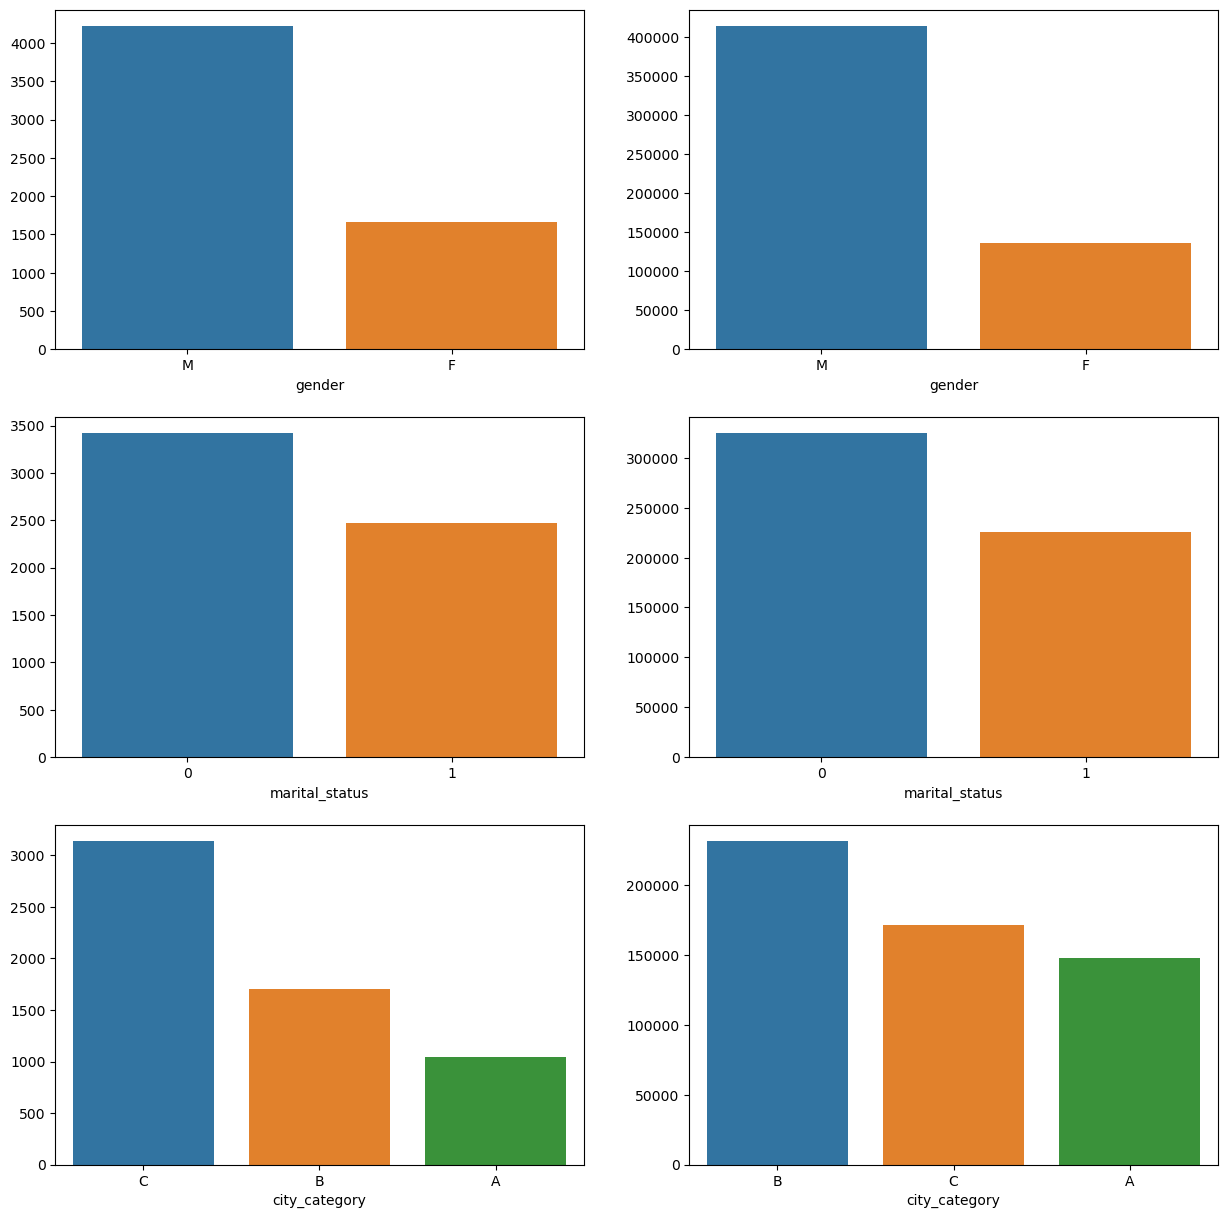

In [103]:
plt.figure(figsize = (15,5*3))

plt.subplot(3,2,1)
sns.countplot(data =usr,x = 'gender',order = usr['gender'].value_counts().index)
plt.ylabel('')

plt.subplot(3,2,2)
sns.countplot(data =df,x = 'gender',order = df['gender'].value_counts().index)
plt.ylabel('')

plt.subplot(3,2,3)
sns.countplot(data = usr,x= 'marital_status',order = usr['marital_status'].value_counts().index)
plt.ylabel('')

plt.subplot(3,2,4)
sns.countplot(data = df,x= 'marital_status',order = df['marital_status'].value_counts().index)
plt.ylabel('')

plt.subplot(3,2,5)
sns.countplot(data = usr,x= 'city_category',order = usr['city_category'].value_counts().index)
plt.ylabel('')

plt.subplot(3,2,6)
sns.countplot(data = df,x= 'city_category',order = df['city_category'].value_counts().index)
plt.ylabel('')

plt.show()

### Observations
1. Although users from category C are more, most of the transactions are done by users from city category B.
2. Most of the users are males and most of the transactions are done by males.
3. Most of the users are unmarried and most of the transactions are done by unmarried users.

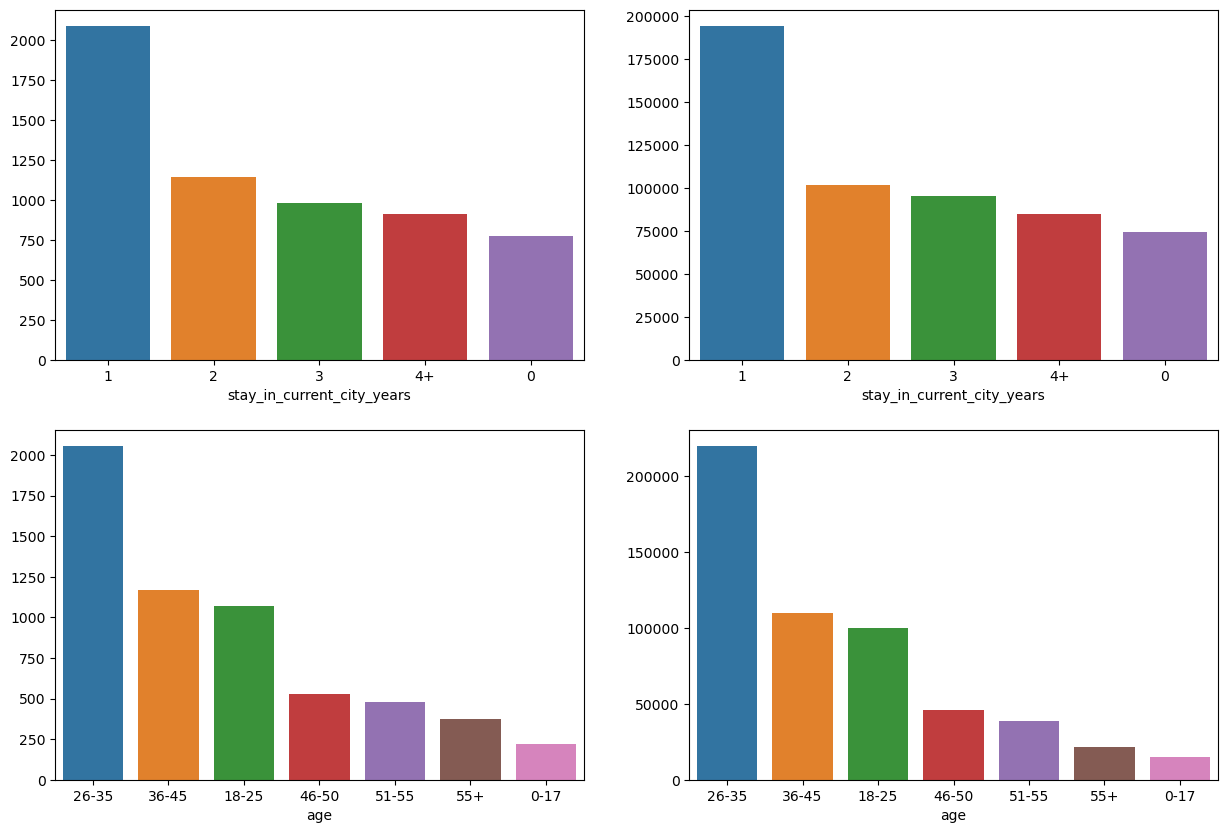

In [104]:
plt.figure(figsize = (15,5*2))

plt.subplot(2,2,1)
sns.countplot(data = usr,x= 'stay_in_current_city_years',order = usr['stay_in_current_city_years'].value_counts().index)
plt.ylabel('')

plt.subplot(2,2,2)
sns.countplot(data = df,x= 'stay_in_current_city_years',order = df['stay_in_current_city_years'].value_counts().index)
plt.ylabel('')

plt.subplot(2,2,3)
sns.countplot(data = usr,x= 'age',order = usr['age'].value_counts().index)
plt.ylabel('')

plt.subplot(2,2,4)
sns.countplot(data = df,x= 'age',order = df['age'].value_counts().index)
plt.ylabel('')

plt.show()

### Observations 
1. Most of the users are within the age of 26-35 age group and most of the transactions are done by the same age group.
2. Most of the users stay 1 year in their current city and most of the transactions are done by the same users.

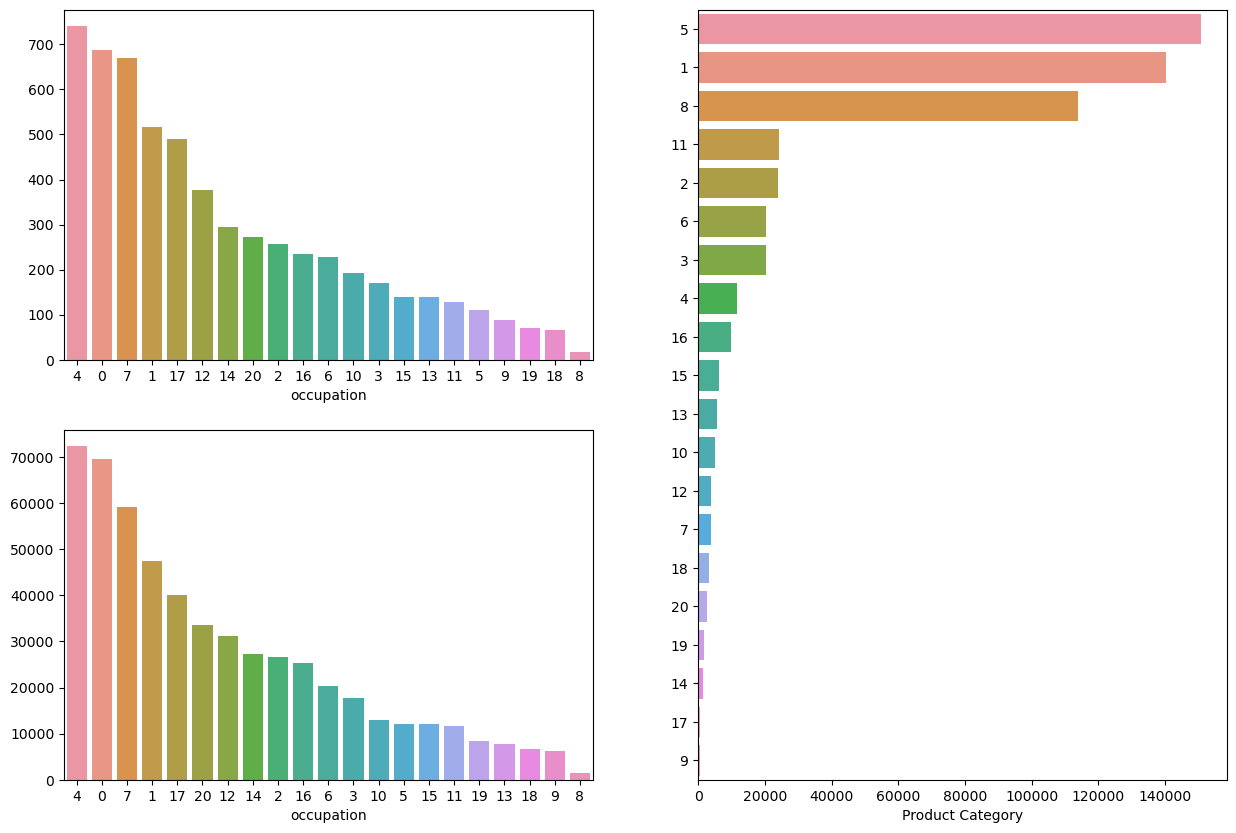

In [105]:
plt.figure(figsize = (15,5*2))

plt.subplot(2,2,1)
sns.countplot(data = usr,x= 'occupation',order = usr['occupation'].value_counts().index)
plt.ylabel('')

plt.subplot(2,2,3)
sns.countplot(data = df,x= 'occupation',order = df['occupation'].value_counts().index)
plt.ylabel('')

plt.subplot(1,2,2)
sns.countplot(data = df,y= 'product_category',order = df['product_category'].value_counts().index)
plt.ylabel('')
plt.xlabel('Product Category')

plt.show()

### Observations
1. Most of the users belong to 4th occupation and most of the transactions are done by these users.
2. Most bought product category belong to 5.

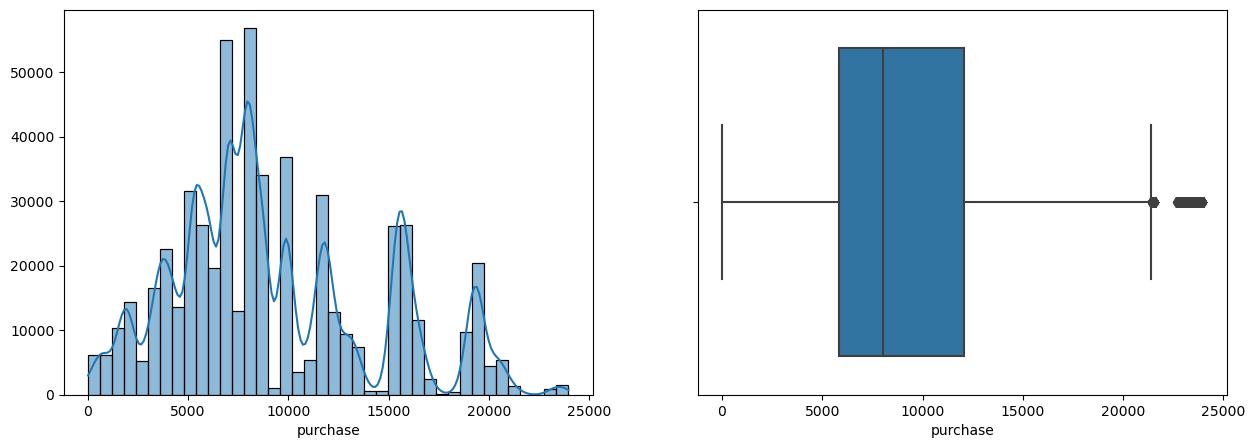

In [106]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.histplot(data = df ,x = 'purchase',kde = True,bins = 40)
plt.ylabel('')

plt.subplot(1,2,2)
sns.boxplot(data = df ,x = 'purchase')
plt.ylabel('')

plt.show()

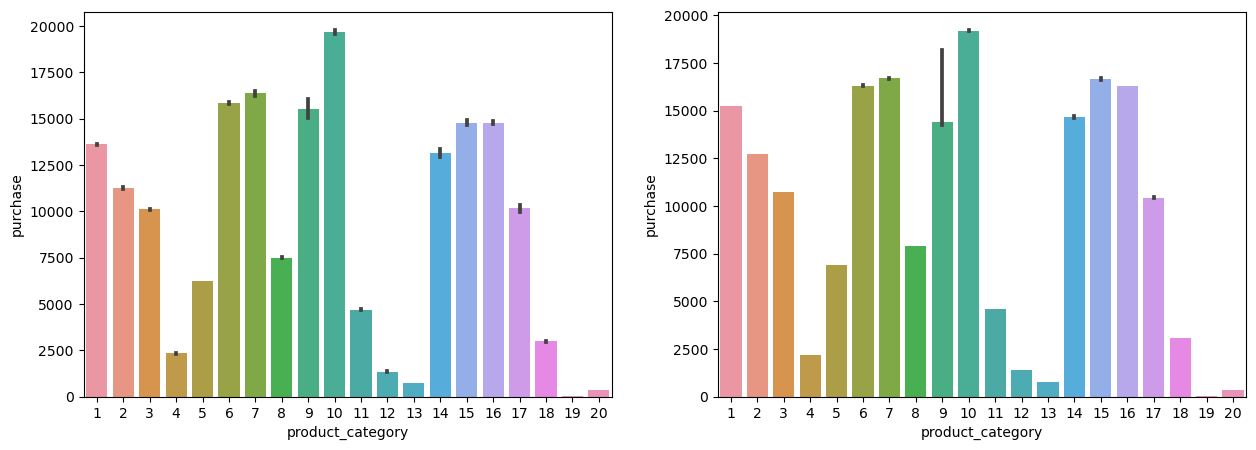

In [129]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'product_category',y= 'purchase')

plt.subplot(1,2,2)
sns.barplot(data = df, x= 'product_category',y= 'purchase', estimator = 'median',)

plt.show()

### Observations
1. As mean and median purchase amount of product_category 10 is more, we can assume its products to be more expensive than any other products_category.
2. Similarly products from product_category 18,19,20,11,12,13,4,5,8  are cheaper than other product categories.


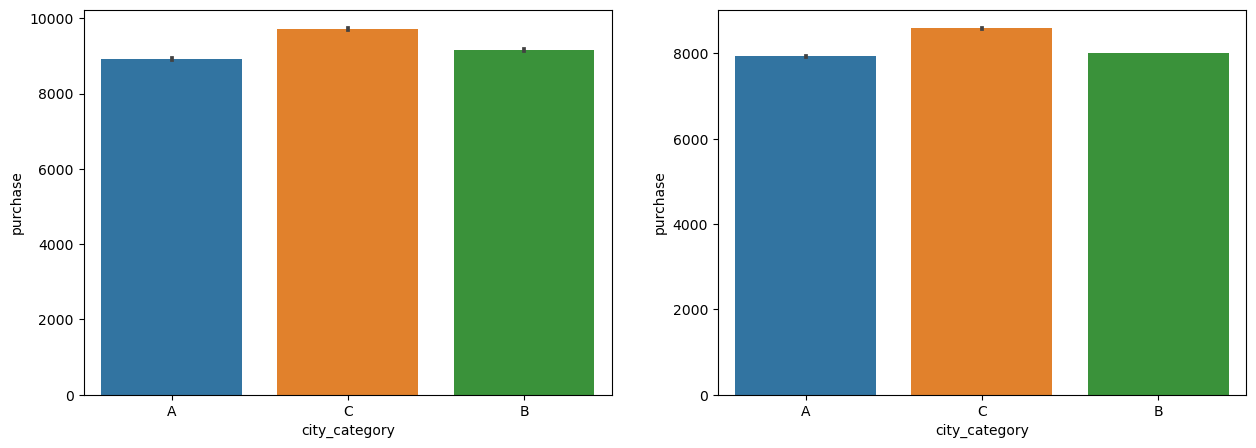

In [131]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.barplot(data = df, x= 'city_category',y= 'purchase')

plt.subplot(1,2,2)
sns.barplot(data = df, x= 'city_category',y= 'purchase', estimator = 'median',)

plt.show()

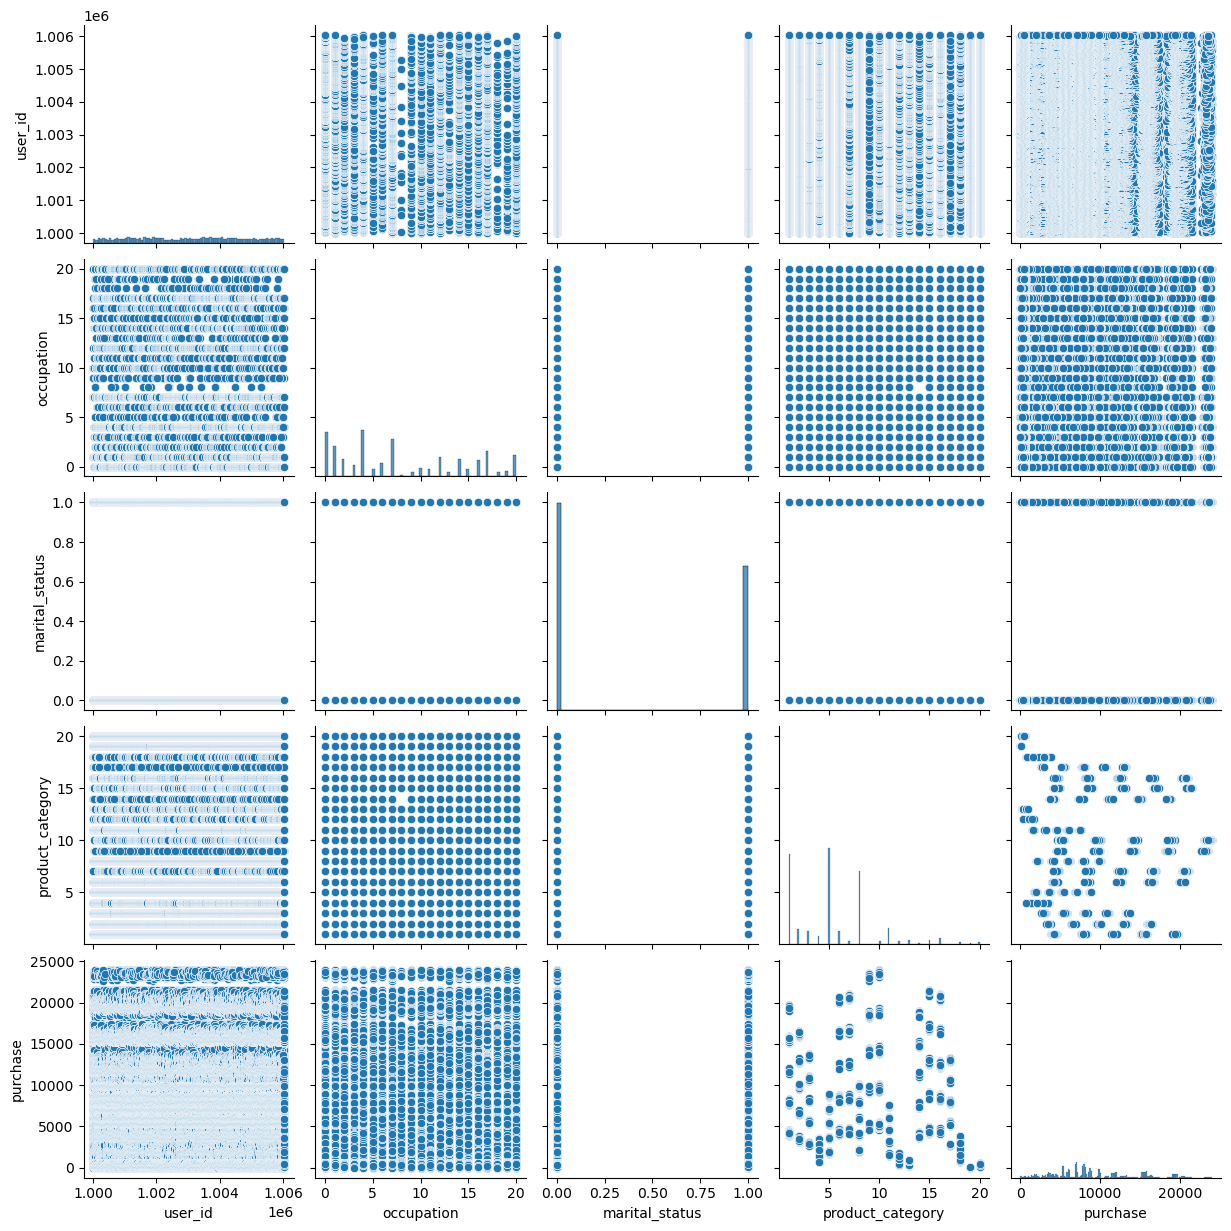

In [108]:
sns.pairplot(df)
plt.show()

### Observations
1. No direct relationship between variables can be induced from the above graph.

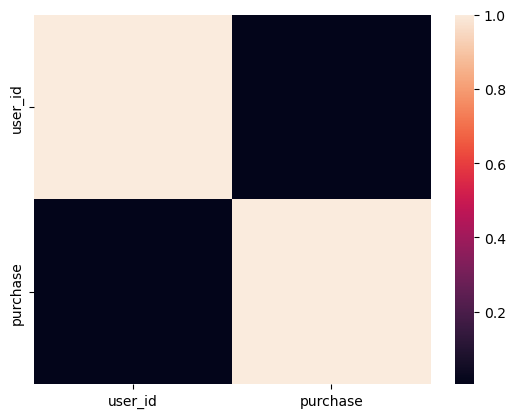

In [109]:
sns.heatmap(df.corr())
plt.show()

# Missing Value 

In [110]:
df.isna().sum()

user_id                       0
product_id                    0
gender                        0
age                           0
occupation                    0
city_category                 0
stay_in_current_city_years    0
marital_status                0
product_category              0
purchase                      0
dtype: int64

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   user_id                     550068 non-null  int64 
 1   product_id                  550068 non-null  object
 2   gender                      550068 non-null  object
 3   age                         550068 non-null  object
 4   occupation                  550068 non-null  object
 5   city_category               550068 non-null  object
 6   stay_in_current_city_years  550068 non-null  object
 7   marital_status              550068 non-null  object
 8   product_category            550068 non-null  object
 9   purchase                    550068 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 42.0+ MB


# Outlier Detection 

In [112]:
q1 = df['purchase'].quantile(0.25)
q3 = df['purchase'].quantile(0.75)

iqr = q3-q1 
lower_lim = q1 - 1.5*iqr
upper_lim = q3 + 1.5*iqr

purchase_outliers = df[(df['purchase'] < lower_lim) | (df['purchase'] > upper_lim)]
purchase_outliers.shape

(2677, 10)

### Observation 
1. There are about 0.48% outliers present in purchase column 

### Conclusion: 
1. When we choose n = 3000 we can say with 99.95% CI that amount puchased by women is less than men.

# Answering Questions 

1. <strong>Are women spending more money per transaction than men? Why or Why not?<br>Ans.</strong> As per the dataset men are spending more than women because then no of transactions performed by men are more than women.<br><br>
2. <strong>Confidence intervals and distribution of the mean of the expenses by female and male customers<br>Ans.</strong> When the sample size is 2500, we can say with 99% CI that male purchase is more than females.<br>Males range: (9178.43416164797, 9692.011760752031)<br>Females Range: (8491.104368625754, 8980.939662574245) <br><br>
3. <strong>Are confidence intervals of average male and female spending overlapping? How can Walmart leverage this conclusion to make changes or improvements?<br>Ans.</strong> Yes the confidence intervals are overlapping. To counter this either we need to reduce the range of confidence intervals or increase the sample size.<br><br>
4. <strong>Results when the same activity is performed for Married vs Unmarried.<br>Ans. </strong>From the dataset, it cannot be clearly concluded that umarried users have more purchase range compared with married users or vice versa.<br><br>
5. <strong>Results when the same activity is performed for Age<br>Ans.</strong>We can say with 95% confidence that age group 55+ and age group 36-55 purchased more than 0-25 age group.<br>We can say with 74% confidence that age group 26-35 purchased more than 0-25 age group.<br>We can say with 59% confidence that age group 36-35 purchased more than 26-35 age group.<br>We can say with 58% confidence that age group 55+ purchased more than 26-35 age group.

### Gender Groups 

In [113]:
for ci in (99,95,90):
    n = 2500 
    z_score = norm.ppf(1-(1-(ci)/100)/2)

    males = [df.loc[df['gender'] == 'M','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    females = [df.loc[df['gender'] == 'F','purchase'].sample(n,replace = True).mean() for i in range(1000)]

    male_mean = np.mean(males)
    female_mean = np.mean(females)

    male_std = np.std(males)
    female_std = np.std(females)

    male_limit = [z_score*male_std*-1 + male_mean, z_score*male_std + male_mean]
    female_limit = [z_score*female_std*-1 + female_mean, z_score*female_std + female_mean]


    print(f"For ci = {ci}%")
    print(f"Range of purchase limit for males is: {male_limit}")
    print(f"Range of purchase limit for females is: {female_limit}\n")        

For ci = 99%
Range of purchase limit for males is: [9178.43416164797, 9692.011760752031]
Range of purchase limit for females is: [8491.104368625754, 8980.939662574245]

For ci = 95%
Range of purchase limit for males is: [9236.235623997633, 9632.494540002364]
Range of purchase limit for females is: [8553.609047777809, 8915.709632222191]

For ci = 90%
Range of purchase limit for males is: [9265.381521231617, 9606.401516368382]
Range of purchase limit for females is: [8575.672057229509, 8898.548161170493]



### Conclusion 
We can say with 99% confidence that males purchased more than females during the Black Friday Sale. 

### Marital Status Groups

In [114]:
for ci in (99,95,60,40,10,5,2,1):
    n = 10000 
    z_score = norm.ppf(1-(1-(ci)/100)/2)

    married = [df.loc[df['marital_status'] == 1,'purchase'].sample(n,replace = True).mean() for i in range(1000)]
    unmarried = [df.loc[df['marital_status'] == 0,'purchase'].sample(n,replace = True).mean() for i in range(1000)]

    married_mean = np.mean(married)
    unmarried_mean = np.mean(unmarried)

    married_std = np.std(married)
    unmarried_std = np.std(unmarried)

    married_limit = [z_score*married_std*-1 + married_mean, z_score*married_std + married_mean]
    unmarried_limit = [z_score*unmarried_std*-1 + unmarried_mean, z_score*unmarried_std + unmarried_mean]


    print(f"For ci = {ci}%")
    print(f"Range of purchase limit for married is: {married_limit}")
    print(f"Range of purchase limit for unmarried is: {unmarried_limit}\n")        

For ci = 99%
Range of purchase limit for married is: [9131.795065046412, 9389.405888553589]
Range of purchase limit for unmarried is: [9135.898201687545, 9393.833666712453]

For ci = 95%
Range of purchase limit for married is: [9160.275691411973, 9356.695913788028]
Range of purchase limit for unmarried is: [9166.814287195146, 9368.536460204854]

For ci = 60%
Range of purchase limit for married is: [9217.741617998816, 9304.342509201184]
Range of purchase limit for unmarried is: [9224.422288513153, 9310.513334286847]

For ci = 40%
Range of purchase limit for married is: [9236.82960834521, 9288.79264625479]
Range of purchase limit for unmarried is: [9241.019829025823, 9294.254140974175]

For ci = 10%
Range of purchase limit for married is: [9253.835743941036, 9266.549028858964]
Range of purchase limit for unmarried is: [9261.954873295366, 9274.34500810464]

For ci = 5%
Range of purchase limit for married is: [9258.277896625417, 9264.344736374585]
Range of purchase limit for unmarried is: 

### Conclusion
1. We can say with 2% confidence that unmarried purchased more than married during the Black Friday sale, this level of confidence is insignificant. So we cannot conclude that unmarried purchased more than married or vice versa during the Black Friday sale.

### Age groups 

In [115]:
def new_age(x):
    if x == '0-17' or x == '18-25':
        return '0-25'
    elif x == '36-45' or x == '46-50' or x == '51-55':
        return '36-55'
    return x
        

In [116]:
df['age_new'] = df.age.apply(new_age)
df['age_new'].value_counts()

26-35    219587
36-55    194215
0-25     114762
55+       21504
Name: age_new, dtype: int64

In [117]:
for ci in (99,95,90,80,60,40,20):
    n = 1000 
    z_score = norm.ppf(1-(1-(ci)/100)/2)

    age1 = [df.loc[df['age_new'] == '0-25','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age2 = [df.loc[df['age_new'] == '26-35','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age3 = [df.loc[df['age_new'] == '36-55','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age4 = [df.loc[df['age_new'] == '55+','purchase'].sample(n,replace = True).mean() for i in range(1000)]

    mean1 = np.mean(age1)
    mean2 = np.mean(age2)
    mean3 = np.mean(age3)
    mean4 = np.mean(age4)

    std1 = np.std(age1)
    std2 = np.std(age2)
    std3 = np.std(age3)
    std4 = np.std(age4)

    limit1 = [z_score*std1*-1 + mean1, z_score*std1 + mean1]
    limit2 = [z_score*std2*-1 + mean2, z_score*std2 + mean2]
    limit3 = [z_score*std3*-1 + mean3, z_score*std3 + mean3]
    limit4 = [z_score*std4*-1 + mean4, z_score*std4 + mean4]

    print(f"For ci = {ci}%")
    print(f"Range of purchase limit for age 0-25 is: {limit1}")
    print(f"Range of purchase limit for age 26-35 is: {limit2}")
    print(f"Range of purchase limit for age 36-55 is: {limit3}")
    print(f"Range of purchase limit for age 55+ is: {limit4}\n")


        

For ci = 99%
Range of purchase limit for age 0-25 is: [8731.30486849481, 9536.524143505188]
Range of purchase limit for age 26-35 is: [8850.058851163492, 9658.317282836506]
Range of purchase limit for age 36-55 is: [8938.322082670884, 9744.282309329117]
Range of purchase limit for age 55+ is: [8921.573559889335, 9751.441356110665]

For ci = 95%
Range of purchase limit for age 0-25 is: [8825.654826021262, 9454.603981978737]
Range of purchase limit for age 26-35 is: [8934.793462108822, 9558.971403891179]
Range of purchase limit for age 36-55 is: [9040.833538305522, 9637.168417694478]
Range of purchase limit for age 55+ is: [9021.750583811347, 9655.924336188655]

For ci = 90%
Range of purchase limit for age 0-25 is: [8872.425073616274, 9392.310214383726]
Range of purchase limit for age 26-35 is: [9001.61893673199, 9507.73781326801]
Range of purchase limit for age 36-55 is: [9090.822957655437, 9600.684122344563]
Range of purchase limit for age 55+ is: [9083.973897229096, 9595.811166770904]

In [118]:
for ci in (99,95,90,80,60,40,20):
    n = 5000 
    z_score = norm.ppf(1-(1-(ci)/100)/2)

    age1 = [df.loc[df['age_new'] == '0-25','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age2 = [df.loc[df['age_new'] == '26-35','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age3 = [df.loc[df['age_new'] == '36-55','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age4 = [df.loc[df['age_new'] == '55+','purchase'].sample(n,replace = True).mean() for i in range(1000)]

    mean1 = np.mean(age1)
    mean2 = np.mean(age2)
    mean3 = np.mean(age3)
    mean4 = np.mean(age4)

    std1 = np.std(age1)
    std2 = np.std(age2)
    std3 = np.std(age3)
    std4 = np.std(age4)

    limit1 = [z_score*std1*-1 + mean1, z_score*std1 + mean1]
    limit2 = [z_score*std2*-1 + mean2, z_score*std2 + mean2]
    limit3 = [z_score*std3*-1 + mean3, z_score*std3 + mean3]
    limit4 = [z_score*std4*-1 + mean4, z_score*std4 + mean4]

    print(f"For ci = {ci}%")
    print(f"Range of purchase limit for age 0-25 is: {limit1}")
    print(f"Range of purchase limit for age 26-35 is: {limit2}")
    print(f"Range of purchase limit for age 36-55 is: {limit3}")
    print(f"Range of purchase limit for age 55+ is: {limit4}\n")


        

For ci = 99%
Range of purchase limit for age 0-25 is: [8959.931058768785, 9318.155136431216]
Range of purchase limit for age 26-35 is: [9069.840414963473, 9437.109201036532]
Range of purchase limit for age 36-55 is: [9160.692656517758, 9522.518755882242]
Range of purchase limit for age 55+ is: [9155.582606919543, 9518.137016680455]

For ci = 95%
Range of purchase limit for age 0-25 is: [8990.75818513722, 9272.78027246278]
Range of purchase limit for age 26-35 is: [9110.614170985507, 9392.96060261449]
Range of purchase limit for age 36-55 is: [9205.797002595487, 9479.651707804513]
Range of purchase limit for age 55+ is: [9199.009036602904, 9476.451403397095]

For ci = 90%
Range of purchase limit for age 0-25 is: [9024.41415484054, 9256.429797159459]
Range of purchase limit for age 26-35 is: [9137.037386695985, 9367.673833304012]
Range of purchase limit for age 36-55 is: [9224.804076592643, 9453.554229807358]
Range of purchase limit for age 55+ is: [9215.307246160573, 9453.008046639428]


In [119]:
for ci in (99,95,90,80,60,40,20):
    n = 10000 
    z_score = norm.ppf(1-(1-(ci)/100)/2)

    age1 = [df.loc[df['age_new'] == '0-25','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age2 = [df.loc[df['age_new'] == '26-35','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age3 = [df.loc[df['age_new'] == '36-55','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age4 = [df.loc[df['age_new'] == '55+','purchase'].sample(n,replace = True).mean() for i in range(1000)]

    mean1 = np.mean(age1)
    mean2 = np.mean(age2)
    mean3 = np.mean(age3)
    mean4 = np.mean(age4)

    std1 = np.std(age1)
    std2 = np.std(age2)
    std3 = np.std(age3)
    std4 = np.std(age4)

    limit1 = [z_score*std1*-1 + mean1, z_score*std1 + mean1]
    limit2 = [z_score*std2*-1 + mean2, z_score*std2 + mean2]
    limit3 = [z_score*std3*-1 + mean3, z_score*std3 + mean3]
    limit4 = [z_score*std4*-1 + mean4, z_score*std4 + mean4]

    print(f"For ci = {ci}%")
    print(f"Range of purchase limit for age 0-25 is: {limit1}")
    print(f"Range of purchase limit for age 26-35 is: {limit2}")
    print(f"Range of purchase limit for age 36-55 is: {limit3}")
    print(f"Range of purchase limit for age 55+ is: {limit4}\n")


        

For ci = 99%
Range of purchase limit for age 0-25 is: [9003.648481311682, 9273.022609688314]
Range of purchase limit for age 26-35 is: [9127.86303058579, 9378.217612414208]
Range of purchase limit for age 36-55 is: [9213.722479984199, 9474.823603015802]
Range of purchase limit for age 55+ is: [9207.502752285756, 9464.334230714245]

For ci = 95%
Range of purchase limit for age 0-25 is: [9041.43122195457, 9237.56279964543]
Range of purchase limit for age 26-35 is: [9155.43620867015, 9348.96662472985]
Range of purchase limit for age 36-55 is: [9245.153186071038, 9443.361936528963]
Range of purchase limit for age 55+ is: [9238.758790407994, 9441.129555992005]

For ci = 90%
Range of purchase limit for age 0-25 is: [9053.917109318947, 9219.943590081053]
Range of purchase limit for age 26-35 is: [9168.145704840621, 9334.632573359379]
Range of purchase limit for age 36-55 is: [9257.544114861465, 9426.128465938536]
Range of purchase limit for age 55+ is: [9259.751800784963, 9415.95498061504]

F

In [125]:
for ci in (59,58,57):
    n = 10000 
    z_score = norm.ppf(1-(1-(ci)/100)/2)

    age1 = [df.loc[df['age_new'] == '0-25','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age2 = [df.loc[df['age_new'] == '26-35','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age3 = [df.loc[df['age_new'] == '36-55','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age4 = [df.loc[df['age_new'] == '55+','purchase'].sample(n,replace = True).mean() for i in range(1000)]

    mean1 = np.mean(age1)
    mean2 = np.mean(age2)
    mean3 = np.mean(age3)
    mean4 = np.mean(age4)

    std1 = np.std(age1)
    std2 = np.std(age2)
    std3 = np.std(age3)
    std4 = np.std(age4)

    limit1 = [z_score*std1*-1 + mean1, z_score*std1 + mean1]
    limit2 = [z_score*std2*-1 + mean2, z_score*std2 + mean2]
    limit3 = [z_score*std3*-1 + mean3, z_score*std3 + mean3]
    limit4 = [z_score*std4*-1 + mean4, z_score*std4 + mean4]

    print(f"For ci = {ci}%")
    print(f"Range of purchase limit for age 0-25 is: {limit1}")
    print(f"Range of purchase limit for age 26-35 is: {limit2}")
    print(f"Range of purchase limit for age 36-55 is: {limit3}")
    print(f"Range of purchase limit for age 55+ is: {limit4}\n")



For ci = 59%
Range of purchase limit for age 0-25 is: [9095.068326933742, 9179.652085666257]
Range of purchase limit for age 26-35 is: [9210.613527429743, 9295.385056170255]
Range of purchase limit for age 36-55 is: [9302.45811239943, 9385.242385600564]
Range of purchase limit for age 55+ is: [9293.325032623989, 9374.67582997601]

For ci = 58%
Range of purchase limit for age 0-25 is: [9095.507286256065, 9178.67544814394]
Range of purchase limit for age 26-35 is: [9214.949189819612, 9297.116312580389]
Range of purchase limit for age 36-55 is: [9303.133617113923, 9384.697745886075]
Range of purchase limit for age 55+ is: [9297.90343352437, 9379.975312075629]

For ci = 57%
Range of purchase limit for age 0-25 is: [9099.120500946481, 9179.114146853522]
Range of purchase limit for age 26-35 is: [9213.243626937734, 9294.036404262266]
Range of purchase limit for age 36-55 is: [9303.460876742545, 9384.482079257454]
Range of purchase limit for age 55+ is: [9294.909108858008, 9375.655284341994]


In [124]:
for ci in (77,76,75,74,73,72,69):
    n = 10000 
    z_score = norm.ppf(1-(1-(ci)/100)/2)

    age1 = [df.loc[df['age_new'] == '0-25','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age2 = [df.loc[df['age_new'] == '26-35','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age3 = [df.loc[df['age_new'] == '36-55','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age4 = [df.loc[df['age_new'] == '55+','purchase'].sample(n,replace = True).mean() for i in range(1000)]

    mean1 = np.mean(age1)
    mean2 = np.mean(age2)
    mean3 = np.mean(age3)
    mean4 = np.mean(age4)

    std1 = np.std(age1)
    std2 = np.std(age2)
    std3 = np.std(age3)
    std4 = np.std(age4)

    limit1 = [z_score*std1*-1 + mean1, z_score*std1 + mean1]
    limit2 = [z_score*std2*-1 + mean2, z_score*std2 + mean2]
    limit3 = [z_score*std3*-1 + mean3, z_score*std3 + mean3]
    limit4 = [z_score*std4*-1 + mean4, z_score*std4 + mean4]

    print(f"For ci = {ci}%")
    print(f"Range of purchase limit for age 0-25 is: {limit1}")
    print(f"Range of purchase limit for age 26-35 is: {limit2}")
    print(f"Range of purchase limit for age 36-55 is: {limit3}")
    print(f"Range of purchase limit for age 55+ is: {limit4}\n")



For ci = 77%
Range of purchase limit for age 0-25 is: [9075.041956301815, 9197.874370098187]
Range of purchase limit for age 26-35 is: [9191.348903617441, 9312.605006982556]
Range of purchase limit for age 36-55 is: [9283.507666565036, 9403.94000563496]
Range of purchase limit for age 55+ is: [9276.640632012974, 9396.928839787024]

For ci = 76%
Range of purchase limit for age 0-25 is: [9076.025424249498, 9198.906796750502]
Range of purchase limit for age 26-35 is: [9193.850899941963, 9307.665471458035]
Range of purchase limit for age 36-55 is: [9280.26378582409, 9402.104518175905]
Range of purchase limit for age 55+ is: [9280.378663418973, 9394.230684581025]

For ci = 75%
Range of purchase limit for age 0-25 is: [9082.57614430614, 9200.978482293862]
Range of purchase limit for age 26-35 is: [9194.505134610365, 9309.677177989637]
Range of purchase limit for age 36-55 is: [9286.796007649822, 9403.700009550177]
Range of purchase limit for age 55+ is: [9278.406777316202, 9392.894569083797]

In [121]:
for ci in (68,67,66,65,64):
    n = 10000 
    z_score = norm.ppf(1-(1-(ci)/100)/2)

    age1 = [df.loc[df['age_new'] == '0-25','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age2 = [df.loc[df['age_new'] == '26-35','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age3 = [df.loc[df['age_new'] == '36-55','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age4 = [df.loc[df['age_new'] == '55+','purchase'].sample(n,replace = True).mean() for i in range(1000)]

    mean1 = np.mean(age1)
    mean2 = np.mean(age2)
    mean3 = np.mean(age3)
    mean4 = np.mean(age4)

    std1 = np.std(age1)
    std2 = np.std(age2)
    std3 = np.std(age3)
    std4 = np.std(age4)

    limit1 = [z_score*std1*-1 + mean1, z_score*std1 + mean1]
    limit2 = [z_score*std2*-1 + mean2, z_score*std2 + mean2]
    limit3 = [z_score*std3*-1 + mean3, z_score*std3 + mean3]
    limit4 = [z_score*std4*-1 + mean4, z_score*std4 + mean4]

    print(f"For ci = {ci}%")
    print(f"Range of purchase limit for age 0-25 is: {limit1}")
    print(f"Range of purchase limit for age 26-35 is: {limit2}")
    print(f"Range of purchase limit for age 36-55 is: {limit3}")
    print(f"Range of purchase limit for age 55+ is: {limit4}\n")


For ci = 68%
Range of purchase limit for age 0-25 is: [9086.673762540824, 9190.384086259175]
Range of purchase limit for age 26-35 is: [9205.399614978765, 9303.211602221234]
Range of purchase limit for age 36-55 is: [9295.350206954532, 9391.32867904547]
Range of purchase limit for age 55+ is: [9286.366572599527, 9386.469624800473]

For ci = 67%
Range of purchase limit for age 0-25 is: [9091.316477967312, 9186.475761032687]
Range of purchase limit for age 26-35 is: [9202.63380161269, 9299.043500187308]
Range of purchase limit for age 36-55 is: [9295.834383358928, 9393.869178241071]
Range of purchase limit for age 55+ is: [9286.379764917308, 9383.528946882694]

For ci = 66%
Range of purchase limit for age 0-25 is: [9090.390984539079, 9186.110668060917]
Range of purchase limit for age 26-35 is: [9206.674019680102, 9299.425515719899]
Range of purchase limit for age 36-55 is: [9295.016251697094, 9390.653817502907]
Range of purchase limit for age 55+ is: [9286.557585799572, 9382.761695400426

In [122]:
for ci in (98,97,96,94,93,92,91):
    n = 10000 
    z_score = norm.ppf(1-(1-(ci)/100)/2)

    age1 = [df.loc[df['age_new'] == '0-25','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age2 = [df.loc[df['age_new'] == '26-35','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age3 = [df.loc[df['age_new'] == '36-55','purchase'].sample(n,replace = True).mean() for i in range(1000)]
    age4 = [df.loc[df['age_new'] == '55+','purchase'].sample(n,replace = True).mean() for i in range(1000)]

    mean1 = np.mean(age1)
    mean2 = np.mean(age2)
    mean3 = np.mean(age3)
    mean4 = np.mean(age4)

    std1 = np.std(age1)
    std2 = np.std(age2)
    std3 = np.std(age3)
    std4 = np.std(age4)

    limit1 = [z_score*std1*-1 + mean1, z_score*std1 + mean1]
    limit2 = [z_score*std2*-1 + mean2, z_score*std2 + mean2]
    limit3 = [z_score*std3*-1 + mean3, z_score*std3 + mean3]
    limit4 = [z_score*std4*-1 + mean4, z_score*std4 + mean4]

    print(f"For ci = {ci}%")
    print(f"Range of purchase limit for age 0-25 is: {limit1}")
    print(f"Range of purchase limit for age 26-35 is: {limit2}")
    print(f"Range of purchase limit for age 36-55 is: {limit3}")
    print(f"Range of purchase limit for age 55+ is: {limit4}\n")


For ci = 98%
Range of purchase limit for age 0-25 is: [9019.666218419283, 9251.25576538072]
Range of purchase limit for age 26-35 is: [9135.910875536343, 9368.555575063658]
Range of purchase limit for age 36-55 is: [9220.980230868656, 9459.99561133135]
Range of purchase limit for age 55+ is: [9222.56716902277, 9453.189049777231]

For ci = 97%
Range of purchase limit for age 0-25 is: [9032.962699291282, 9242.972600508718]
Range of purchase limit for age 26-35 is: [9141.137125863233, 9363.907595336763]
Range of purchase limit for age 36-55 is: [9235.181264666138, 9450.431857333864]
Range of purchase limit for age 55+ is: [9224.739033534835, 9447.703958265167]

For ci = 96%
Range of purchase limit for age 0-25 is: [9032.557869751934, 9243.91940984807]
Range of purchase limit for age 26-35 is: [9149.372637814116, 9355.170834185881]
Range of purchase limit for age 36-55 is: [9239.80574528632, 9444.763616113682]
Range of purchase limit for age 55+ is: [9237.639246267874, 9441.849755132127]



### Conclusion
1. We can say with 95% confidence that age group 55+ and age group 36-55 purchased more than 0-25 age group.
2. We can say with 74% confidence that age group 26-35 purchased more than 0-25 age group.
3. We can say with 59% confidence that age group 36-35 purchased more than 26-35 age group.
4. We can say with 59% confidence that age group 55+ purchased more than 26-35 age group.

### Observations 
1. To get a clear confidence interval between groups we need to either decrease the CI or need to increase the sample size.

# Final Insights 

<strong>General Insights</strong>
1. There are 7 different bins of age and Most of the users are within the age of 26-35 age group and most of the transactions are done by the same age group.
2. There are two types of genders that are present in the dataset, Most of the users are males and most of the transactions are done by males.
3. There are 21 unique values in occupation column and Most of the users belong to 4th occupation and most of the transactions are done by these users.
4. There are only 3 different city_category, Although users from category C are more, most of the transactions are done by users from city category B. 
5. There are 20 different product_category, most of the products being of product_category 5.
6. Most of the users are unmarried and most of the transactions are done by unmarried users.
7. Most of the users stay 1 year in their current city and most of the transactions are done by these users.
8. Product_category has more expensive products compared to other categories
9. Products from product_category 18,19,20,11,12,13,4,5,8  are cheaper than other product categories.


<strong>Statistical Insights </strong>
1. We can say with 99% confidence(sample size = 10000) that male purchased more than women during the Black Friday Sale.
2. We cannot conclude that unmarried users purchased more than married users or vice versa.
3. We can say with 95% confidence that age group 55+ and age group 36-55 purchased more than 0-25 age group.
4. We can say with 74% confidence that age group 26-35 purchased more than 0-25 age group.
5. We can say with 59% confidence that age group 36-35 purchased more than 26-35 age group.
6. We can say with 58% confidence that age group 55+ purchased more than 26-35 age group.

# Recommendations  

1. We can club the most sold and least sold products to increase the sale. By using this we can target more female users.
2. We can focus marketing efforts on the 26-35 age group, as they constitute the majority of users and transactions.
3. Despite more users being from category C, we can prioritize marketing initiatives in category B, where most transactions occur.
4. We could market less expensive products for the age group 0-25.
5. We can provide discounts and promotions for 36-55 and 55+ as they constitute majority of transactions.
6. Similarly we could start loyalty programs for retention of most users.